# Инфраструктура Python. Строки, даты, коллекции

## Строки

Упоминаются библиотеки `string`, `unicodedata`, `PyICU`, `transliterate`, `base64`, `chardet`, `pycld2`, `python-Levenshtein`, `difflib`, `python-finediff`, `bsdiff4`, `re`, `regex`, `lark-parser`, `datrie`.

In [1]:
print 'ABC'[:-1]
print 'a' * 5 + '\x42' * 3
print ord('A'), chr(65)
print unichr(0x419), u'\u0419'

AB
aaaaaBBB
65 A
Й Й


Часто используемые методы строк:

In [2]:
s = 'what was that? antonovka'
print s.startswith('what'), s.endswith('golden')
print s.find('a')
print s.rfind('a')
print s.find('x')

True False
2
23
-1


In [3]:
print s.count('a')

5


In [4]:
print s.lower()
print s.upper()
print s.title()
print s.capitalize()

what was that? antonovka
WHAT WAS THAT? ANTONOVKA
What Was That? Antonovka
What was that? antonovka


In [5]:
print repr(' abc  '.strip())
print repr('abc'.rjust(5, '_'))

'abc'
'__abc'


In [6]:
print s.split()
print s.split('a')
print '|'.join(s.split())

['what', 'was', 'that?', 'antonovka']
['wh', 't w', 's th', 't? ', 'ntonovk', '']
what|was|that?|antonovka


In [7]:
print s.replace('a', '[A]')

wh[A]t w[A]s th[A]t? [A]ntonovk[A]


Python поддерживает форматированный вывод в стиле C `printf`. Подробнее о форматной строке https://docs.python.org/2/library/stdtypes.html#string-formatting-operations

In [8]:
from math import pi
print '%s %05d %.4f %x' % ('hi', 42, pi, 3735928559)

hi 00042 3.1416 deadbeef


In [9]:
print '%0*d' % (3, 7)

007


In [10]:
print 'repr is %r' % {'abc': 'def'}

repr is {'abc': 'def'}


In [11]:
var = 'hello'
print '%(var)d' % {'var': 42}
print '%(var)s' % globals()

42
hello


Если вам понадобился аналогичный метод `str.format` со своим более мощным синтаксисом форматной строки, где-то ваша жизнь свернула не туда.

In [12]:
'{:*^20,}'.format(1234567890)

'***1,234,567,890****'

In [13]:
import string

In [14]:
tpl = string.Template('$subj was a $obj')
tpl.substitute(subj='this', obj='triumph')

'this was a triumph'

Классы символов https://docs.python.org/2/library/string.html#string-constants

In [15]:
print string.ascii_letters
print string.ascii_uppercase
print string.digits
print 'A'.isupper(), '221B'.isdigit()

abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ
ABCDEFGHIJKLMNOPQRSTUVWXYZ
0123456789
True False


In [16]:
import unicodedata
u = u'Й'
print unicodedata.lookup('CYRILLIC CAPITAL LETTER SHORT I'), unicodedata.name(u)
print unicodedata.category(u) # 'L'etter, 'u'ppercase
print repr(unicodedata.normalize('NFD', u))
print ' + '.join([unicodedata.name(ch) for ch in unicodedata.normalize('NFD', u)])

Й CYRILLIC CAPITAL LETTER SHORT I
Lu
u'\u0418\u0306'
CYRILLIC CAPITAL LETTER I + COMBINING BREVE


NFD это способ приведения Unicode-строки, которая может записывать один и тот же видимый символ несколькими разными последовательностями Unicode-символов, к «общему знаменателю». NFD пытается каждый символ разбить на составляющие (й &rarr; и + бреве), NFC наоборот, собрать.

Для активной работы с интернационализацией и региональными языковыми стандартами используется отраслевой стандарт, библиотека ICU (International Components for Unicode) и враппер над ней `PyICU`.

```
Из VC++2008 command prompt
conda list
Найти номер версии icu в списке

set ICU_VERSION=58.2 -- подставить номер версии
set PYICU_INCLUDES=%USERPROFILE%/Anaconda2/Library/include
set LIB=%LIB%;%USERPROFILE%/Anaconda2/Library/lib

pip install PyICU --global-option build_ext --global-option --compiler=msvc
```

In [17]:
import icu

In [18]:
s = u'ß i'
print s.upper()
print unicode(icu.UnicodeString(s).toUpper(icu.Locale('de_DE')))
print unicode(icu.UnicodeString(s).toUpper(icu.Locale('tr_TR')))

ß I
SS I
SS İ


In [19]:
print ''.join(sorted(u'ёжик'))
collator = icu.Collator.createInstance(icu.Locale('ru_RU'))
print ''.join(sorted(u'ёжик', key=collator.getSortKey))

жикё
ёжик


Хорошее введение в проблемы, связанные с Unicode-строками, можно найти здесь https://github.com/CppCon/CppCon2014/blob/master/Presentations/Unicode%20in%20C%2B%2B/Unicode%20in%20C%2B%2B%20-%20McNellis%20-%20CppCon%202014.pdf

In [20]:
print icu.RuleBasedNumberFormat(icu.URBNFRuleSetTag.SPELLOUT, icu.Locale('fr')).format(123)

cent vingt-trois


In [21]:
from datetime import datetime
formatter = icu.DateFormat.createDateTimeInstance(icu.DateFormat.LONG, icu.DateFormat.kDefault, icu.Locale('uk_UA'))
print formatter.format(datetime.now())

21 липня 2019 р. о 20:06:56


In [22]:
transl = icu.Transliterator.createInstance('Russian-Latin/BGN')
print transl.transliterate('Съешь ещё этих мягких французских булок да выпей чаю')

Sʺyeshʹ yeshchë etikh myagkikh frantsuzskikh bulok da vypey chayu


In [23]:
len(list(icu.Transliterator.getAvailableIDs()))

578

Несколько более привычный вариант транслитерации предоставляет библиотека `transliterate`. Вообще же задача транслитерации кириллицы в латиницу непроста и насчитывает минимум 15 конкурирующих стандартов https://ru.wikipedia.org/wiki/Транслитерация_русского_алфавита_латиницей

```
pip install transliterate
```

In [24]:
import transliterate
print transliterate.translit(u'Съешь ещё этих мягких французских булок да выпей чаю', reversed=True)

S'esh' esche etih mjagkih frantsuzskih bulok da vypej chaju


Если видишь на клетке надпись "бНОПНЯ", не верь глазам своим. Текст был записан в кодировке CP1251, а отобразили его, считая, что это кодировка KOI8-R. https://docs.python.org/2.7/library/codecs.html#standard-encodings

In [25]:
print (u'бНОПНЯ'.encode('koi8_r').decode('cp1251'))

Вопрос


In [26]:
print 'Вопрос'.encode('hex')
print repr(u'Вопрос')
print repr(u'Вопрос'.encode('utf-8'))
print u'Вопрос'.encode('cp1251').encode('hex')

d092d0bed0bfd180d0bed181
u'\u0412\u043e\u043f\u0440\u043e\u0441'
'\xd0\x92\xd0\xbe\xd0\xbf\xd1\x80\xd0\xbe\xd1\x81'
c2eeeff0eef1


В целевой кодировке нужных символов запросто может и не оказаться, в этом случае вылетит `UnicodeEncodeError`. Избежать этого можно дополнительным параметром, сообщающим, как поступить с нетранслирующимся символом: `ignore`, `replace` или `xmlcharrefreplace`.

In [27]:
s = u'Example: اللغة العربية'
print s.encode('cp1251', 'ignore')
print s.encode('cp1251', 'replace')
print s.encode('cp1251', 'xmlcharrefreplace')

Example:  
Example: ????? ???????
Example: &#1575;&#1604;&#1604;&#1594;&#1577; &#1575;&#1604;&#1593;&#1585;&#1576;&#1610;&#1577;


In [28]:
print repr('Вопрос'.encode('base64'))

'0JLQvtC/0YDQvtGB\n'


Метод `.encode('base64')` имеет неприятную привычку добавлять каждые 76 символов перевод строки. Избежать этого позволит встроенная библиотека `base64`, в которой, кроме обычного base64 реализован еще и url-safe вариант, в котором вместо неподходящих для файловых путей и URL символов `+/` используются `-_`.

In [29]:
import base64
print repr(base64.b64encode('Вопрос'))
print repr(base64.urlsafe_b64encode('Вопрос'))

'0JLQvtC/0YDQvtGB'
'0JLQvtC_0YDQvtGB'


In [30]:
print repr('Вопрос'.encode('bz2'))
print repr('Вопрос'.encode('zlib'))

'BZh91AY&SYuy^a\x00\x00\x03\x00j`\x00\x10\x00\x00\x01\xe0\x00 \x001\x0c\x00\x94\x1az\x88\x86\xc9\xcd\xf8\xbb\x92)\xc2\x84\x83\xab\xca\xf3\x08'
'x\x9c\xbb0\xe9\xc2\xbe\x0b\xfb/6\\\xd8w\xb1\x11\x009\x9c\x08\xb1'


In [31]:
print '=D0=92=D0=BE=D0=BF=D1=80=D0=BE=D1=81'.decode('quoted_printable')

Вопрос


In [32]:
print 'xn--' + 'Вопрос'.encode('punycode') + '.com'

xn--ac3c6jbe0jbbcjd.com


In [33]:
print '80aa8arcefjq'.decode('punycode')

смартхаус


In [34]:
print 'caesar cypher'.encode('rot13')

pnrfne plcure


In [35]:
import encodings.aliases
print len(encodings.aliases.aliases)

307


Определить кодировку может помочь библиотека `chardet`, входящая в Anaconda.

In [36]:
print repr(u'Привет, мир'.encode('cp866'))

'\x8f\xe0\xa8\xa2\xa5\xe2, \xac\xa8\xe0'


In [37]:
import chardet
bytes = '\x8f\xe0\xa8\xa2\xa5\xe2, \xac\xa8\xe0'
cp = chardet.detect(bytes)
print cp
print bytes.decode(cp['encoding'])

{'confidence': 0.99, 'language': 'Russian', 'encoding': 'IBM866'}
Привет, мир


Для распознавания языка текста можно использовать библиотеку `pycld2`, которая является враппером над библиотекой CLD2, использующейся внутри Chrome для этой цели. Рассмотрим очень известную интернациональную фразу (из Википедии, первый вариант).

```
pip install pycld2
```

In [38]:
import pycld2

In [39]:
phrases = '''\
Абхазский: Апролетарцәа атәылақәа ӡегьы рҿы иҟоу, шәҽеидышәкыл!
Аварский: Тlолго дунялалъул хlалтlухъаби, цолъе нуж!
Азербайджанский: Bütün ölkələrin proletarları, birləşin!
Албанский: Punetoret e te gjithe vendeve bashkohuni!
Английский: Workers of the world, unite!
Арабский:  !يا عمال العالم اتحدوا
Армянский, Восточный: Պրոլետարներ բոլոր երկրների, միացե՜ք։
Армянский, Западный: Բոլոր երկրներու աշխատաւորներ, միացէ՜ք։
Африкаанс: Werkers van alle lande, verenig!
Баскский: Herrialde guztietako proletarioak, elkar zaitezte!
Башкирский: Бөтә илдәрҙең пролетарийҙәре, берләшегеҙ!
Белорусский: Пралетарыі ўсіх краін, яднайцеся!
Бенгальский: দুনিযার মজদুর, এক হও!
Боснийский: Proleteri svih zemalja, ujedinite se!
Болгарский: Пролетарии от всички страни, съединявайте се!
Бурятский: Бүхы оронуудай пролетаринар, нэгэдэгты!
Валлийский: Gweithwyr yr holl wledydd, uno!
Венгерский: Világ proletárjai, egyesüljetek!
Вьетнамский: Vô sản toàn thế giới, đoàn kết lại!
Гаитянский креольский: Travayè nan tout peyi, ini!
Галисийский: Traballadores do mundo, unídevos!
Грузинский: პროლეტარებო ყველა ქვეყნისა, შეერთდით!
Греческий: Προλετάριοι όλων των χωρών, ενωθείτε!
Гуджарати: બધા દેશોમાં કામદાર સંગઠિત!
Датский: Proletarer i alle lande, foren jer!
Иврит: !פועלי כל העולם התאחדו
Идиш: !פראָלעטאריער פון אלע לענדער, פאראייניקט זיך
Индонезийский: Para pekerja di seluruh dunia, bersatulah!
Ирландский: Oibrithe an domhain, aontaigh!
Исландский: Verkamenn allra landa, sameinist!
Испанский: ¡Trabajadores del mundo, uníos!
Итальянский: Lavoratori di tutto il mondo, unitevi!
Казахский: Барлық елдердің пролетарлары, бірігіңдер!
Калмыцкий: Цуг орн-нутгудын пролетармуд, нэгдцхәтн!
Каннада: ಎಲ್ಲಾ ದೇಶಗಳ ಸಹೋದ್ಯೋಗಿಗಳು, ಯುನೈಟ್!
Карачаево-балкарский: Бютеу дунияны пролетарлары, бирлешигиз!
Карельский: Kaikkien maiden proletaarit, liittykää yhteen!
Каталанский: Proletaris de tots els països, uniu-vos!
Китайский (КНР): 全世界无产者,联合起来!
Китайский (Тайвань): 全世界無產者,聯合起來!
Коми: Став мувывса пролетарийяс, отувтчöй!
Корейский: 만국의 노동자여, 단결하라!
Крымскотатарский: Bütün memleketlerniñ proletarları, birleş!
Курдский: Kirêkaranî/karkerên dinya/cîhanê yekgirin/hevgirin!
Киргизский: Бардык өлкөлөрдүн пролетарлары, бириккиле!
Латынь: Laborantes universis terris iunguntur!
Латышский: Visu zemju proletārieši, savienojieties!
Литовский: Visų šalių proletarai, vienykitės!
Македонский: Пролетери од сите земји, обединете се!
Малагасийский: Mpiasa eran’izao tontolo izao, mampiray!
Малайский: Pekerja semua negara, bersatu!
Мальтийский: Ħaddiema tal-pajjiżi kollha, jingħaqdu!!
Марийский: Чыла элласе пролетарий-влак ушныза
Молдавский: Proletari din toate ţările, uniţi-vă!
Монгольский: Орон бүрийн пролетари нар нэгдэгтүн!
Немецкий: Proletarier aller Länder, vereinigt Euch!
Нидерландский: Proletariërs aller landen, verenigt U!
Норвежский, Букмол: Arbeidere i alle land, foren dere!
Норвежский, Нюнорск: Arbeidarar i alle land, samein dykk!
Окситанский: Proletaris de totes los païses, unissètz-vos!
Осетинский: Ӕппӕт бӕстӕты пролетартӕ, баиу ут!
Персидский: کارگران جهان متحد شوید
Польский: Proletariusze wszystkich krajów, łączcie się!
Португальский: Trabalhadores do mundo, uni-vos!
Румынский: Proletari din toate ţările, uniţi-vă!
Сербский: Пролетери свих земаља, уједините се!
Словацкий: Proletári všetkých krajín, spojte sa!
Словенский: Proletarci vse dezel, zdruzite se!
Суахили: Wafanyakazi wa nchi zote, kuungana!
Таджикский: Пролетарҳои ҳамаи мамлакатҳо, як шавед!
Тайский: แรงงานจากทุกประเทศรวมกัน!
Тамильский: அனைத்து நாடுகளின் தொழிலாளர்கள், இணைக்க!
Татарский: Барлык илләрнең пролетарийлары, берләшегез!
Телугу: అన్ని దేశాల వర్కర్స్, ఐక్యం!
Тувинский: Бүгү чурттарның пролетарийлери, каттыжыңар!
Турецкий: Bütün ülkelerin işçileri, birleşin!
Туркменский: Ähli ýurtlaryň proletarlary, birleşiň!
Удмуртский: Вань кунъёсысь пролетарийёс, огазеяське!
Узбекский: Butun dunyo proletarlari, birlashingiz!
Украинский: Пролетарі всіх країн, єднайтеся!
Урду:  !،تمام ممالک کے ورکرز متحد
Филиппинский: Mga manggagawa ng mundo, magkaisa!
Финский: Kaikkien maiden proletaarit, liittykää yhteen!
Французский: Prolétaires de tous les pays, unissez-vous!
Хинди: दुनिया के मज़दूरों, एक हों!
Хорватский: Proleteri svih zemalja, ujedinite se!
Чешский: Proletáři všech zemí, spojte se!
Чувашский: Пĕтĕм тĕнчери пролетарисем, пĕрлешĕр!
Шведский: Arbetare i alla länder, förenen eder!
Эсперанто: Proletoj el ĉiuj landoj, unuiĝu!
Эстонский: Kõigi maade proletaarlased, ühinege!
Якутский: Бүтүн дойдулар пролетарийдара, биир буолуҥ!
Японский: 万国の労働者よ、団結せよ!
'''.splitlines()

In [40]:
len(phrases)

93

In [41]:
for phrase in phrases:
    lang, text = phrase.split(': ')
    print lang, pycld2.detect(text)[2][0]

Абхазский ('ABKHAZIAN', 'ab', 98, 800.0)
Аварский ('Unknown', 'un', 0, 0.0)
Азербайджанский ('AZERBAIJANI', 'az', 97, 1313.0)
Албанский ('ALBANIAN', 'sq', 97, 1148.0)
Английский ('ENGLISH', 'en', 96, 1289.0)
Арабский ('ARABIC', 'ar', 97, 640.0)
Армянский, Восточный ('ARMENIAN', 'hy', 100, 1024.0)
Армянский, Западный ('ARMENIAN', 'hy', 100, 1024.0)
Африкаанс ('AFRIKAANS', 'af', 96, 495.0)
Баскский ('BASQUE', 'eu', 98, 1755.0)
Башкирский ('BASHKIR', 'ba', 98, 781.0)
Белорусский ('BELARUSIAN', 'be', 98, 614.0)
Бенгальский ('BENGALI', 'bn', 98, 433.0)
Боснийский ('CROATIAN', 'hr', 97, 625.0)
Болгарский ('BULGARIAN', 'bg', 98, 786.0)
Бурятский ('MONGOLIAN', 'mn', 98, 568.0)
Валлийский ('WELSH', 'cy', 96, 1843.0)
Венгерский ('HUNGARIAN', 'hu', 97, 1505.0)
Вьетнамский ('VIETNAMESE', 'vi', 97, 1472.0)
Гаитянский креольский ('HAITIAN_CREOLE', 'ht', 96, 1251.0)
Галисийский ('GALICIAN', 'gl', 97, 682.0)
Грузинский ('GEORGIAN', 'ka', 100, 1024.0)
Греческий ('GREEK', 'el', 100, 1024.0)
Гуджарати ('

CLD2 не угадал языки (вместо этого решил, что): аварский, боснийский (хорватский), бурятский (монгольский), датский, испанский (галисийский), калмыцкий (монгольский), карачаево-балкарский (туркменский), карельский (финский), коми, крымско-татарский (турецкий), курдский, малайский (индонезийский), марийский, молдавский (румынский), осетинский, тувинский, удмуртский, чувашский, якутский.

74/93.

Расстояние Левенштейна (библиотека `python-Levenshtein`) и генерирование диффов (дельт) над строками (встроенная библиотека `difflib` и дающая обычно лучшие результаты библиотека `python-finediff`).

```
pip install python-Levenshtein
```

In [42]:
import Levenshtein
print Levenshtein.distance('abcdef', 'badefo')
print Levenshtein.editops('abcdef', 'badefo')

3
[('delete', 0, 0), ('replace', 2, 1), ('insert', 6, 5)]


In [43]:
import difflib
list(difflib.Differ().compare('abcdef', 'badefo'))

['+ b', '  a', '- b', '- c', '  d', '  e', '  f', '+ o']

```
pip install https://github.com/sharpden/python-finediff/tarball/master
```

In [44]:
import finediff
finediff.FineDiff('abcdef', 'badefo').renderDiffToHTML()

'<del>a</del>b<del>c</del><ins>a</ins>def<ins>o</ins>'

In [45]:
def show_diff(A, B, engine='finediff', format='html'):
    def compact_difflib_diff(A, B):
        import difflib
        prev_type = ''
        s = []
        for typ, _, ch in difflib.Differ().compare(A, B):
            if prev_type != typ and prev_type:
                yield prev_type, ''.join(s)
                s = []
            prev_type = typ
            s.append(ch)
        if s:
            yield prev_type, ''.join(s)
            
    def compact_finediff_diff(A, B):
        import finediff
        fd = finediff.FineDiff(A, B)
        in_offset = 0
        result = []
        for edit in fd.getOps():
            n = edit.getFromLen()
            if isinstance(edit, finediff.FineDiffCopyOp):
                yield ' ', A[in_offset : in_offset + n]
            elif isinstance(edit, finediff.FineDiffDeleteOp):
                yield '-', A[in_offset : in_offset + n]
            elif isinstance(edit, finediff.FineDiffInsertOp):
                yield '+', edit.getText()
            else: # elif isinstance(edit, finediff.FineDiffReplaceOp):
                yield '-', A[in_offset : in_offset + n]
                yield '+', edit.getText()
            in_offset += n
            
    if engine == 'finediff':
        generator = compact_finediff_diff
    elif engine == 'difflib':
        generator = compact_difflib_diff

    if format == 'html':
        import IPython, cgi
        html = []
        for typ, s in generator(A, B):
            if typ == ' ':
                html.append(cgi.escape(s))
            elif typ == '-':
                html.append('<del>' + cgi.escape(s) + '</del>')
            elif typ == '+':
                html.append('<ins>' + cgi.escape(s) + '</ins>')
        html = ''.join(html)
        html = '''\
            <style>
                /*ins { color: green; background: #dfd; text-decoration: none; }
                del { color: red; background: #fdd; text-decoration: none; }*/
                ins { background: green; color: white; text-decoration: none; }
                del { background: red; color: white; text-decoration: none; }
            </style>
            <pre>%s</pre>
        ''' % html
        IPython.display.display(IPython.display.HTML(html))
    elif format == 'text':
        from colorama import Fore, Back, Style
        result = []
        for typ, s in generator(A, B):
            if typ == ' ':
                result.append(s)
            elif typ == '-':
                result.append(Fore.YELLOW + Back.RED + s + Style.RESET_ALL + Fore.BLACK)
            elif typ == '+':
                result.append(Fore.YELLOW + Back.GREEN + s + Style.RESET_ALL + Fore.BLACK)
        print ''.join(result)

In [46]:
show_diff('abcdef', 'badefo')

Библиотека `bsdiff4` заточена под создание бинарных патчей и аналогична утилите `bsdiff`. Для коротких строк она не так эффективна

```
pip install bsdiff4
```

In [47]:
import bsdiff4

In [48]:
patch = bsdiff4.diff('abcdef', 'badefo')
patch

"BSDIFF40)\x00\x00\x00\x00\x00\x00\x00\x0e\x00\x00\x00\x00\x00\x00\x00\x06\x00\x00\x00\x00\x00\x00\x00BZh91AY&SY\xd4\x05\xb3\x0c\x00\x00\x01@\x00O\x00 \x000\xcd\x00\xc3A\x81'7\x17rE8P\x90\xd4\x05\xb3\x0cBZh9\x17rE8P\x90\x00\x00\x00\x00BZh91AY&SY\x1b\xe2\r\x96\x00\x00\x00\x81\x007\x00\xa0\x00!\x80\x0c\x01g.\xe2\xeeH\xa7\n\x12\x03|A\xb2\xc0"

In [49]:
bsdiff4.patch('abcdef', patch)

'badefo'

Python поддерживает регулярные выражения, похожие на PCRE, встроенной библиотекой `re`. Регулярные выражения нужны, чтобы разбирать или искать строки по образцу, части которого соответствуют классу символов, их последовательности, нескольким альтернативам, повторению некоторого шаблона. Строковый литерал вида `r'...'` позволяет не эскейпить бэкслеши, не считая случая, когда он последний в строке. https://docs.python.org/2/library/re.html#regular-expression-syntax

In [50]:
import re

Проверка соответствия шаблону три цифры, дефис, две цифры, дефис, две цифры и выделение этих цифровых групп

In [51]:
rx = r'^(\d{3})-(\d{2})-(\d{2})$'
print re.match(rx, '222-33-44').groups()
print re.match(rx, '22-333-44')

('222', '33', '44')
None


Поиск в «Алисе в стране чудес» слов от 13 букв и больше

In [52]:
import nltk
alice = nltk.corpus.gutenberg.raw('carroll-alice.txt')

In [53]:
re.findall(r'\w{13,}', alice)

[u'conversations',
 u'disappointment',
 u'Multiplication',
 u'inquisitively',
 u'uncomfortable',
 u'uncomfortable',
 u'circumstances',
 u'contemptuously',
 u'extraordinary',
 u'straightening',
 u'uncomfortable',
 u'contemptuously',
 u'extraordinary',
 u'uncomfortable',
 u'affectionately',
 u'uncomfortably']

Замена вхождения на строку, на строку с захваченными подмасками (нумероваными или именоваными), на строку, строку, упоминающую подмаску, результат функции от вхождения

In [54]:
s = '2 km is about 2187 yards'
print re.sub(r'\d+', '?', s)
print re.sub(r'(\d+) (\w+)', r'[\1] (\2)', s)
print re.sub(r'(?P<count>\d+) (?P<dimension>\w+)', r'[\g<count>] (\g<dimension>)', s)
print re.sub(r'\d+', lambda match: str(int(match.group()) * 2), s)

? km is about ? yards
[2] (km) is about [2187] (yards)
[2] (km) is about [2187] (yards)
4 km is about 4374 yards


Поиск вхождений, а не только совпавших подстрок

In [55]:
s = '2 km is about 2187 yards, 5 kcal is about 20920 joules'
for match in re.finditer(r'(?P<count>\d+) (?P<dimension>\w+)', s):
    print (match.group(), match.group('count'), match.group('dimension'))
    print match.groupdict()
    print match.span()
    print

('2 km', '2', 'km')
{'count': '2', 'dimension': 'km'}
(0, 4)

('2187 yards', '2187', 'yards')
{'count': '2187', 'dimension': 'yards'}
(14, 24)

('5 kcal', '5', 'kcal')
{'count': '5', 'dimension': 'kcal'}
(26, 32)

('20920 joules', '20920', 'joules')
{'count': '20920', 'dimension': 'joules'}
(42, 54)



Удобным онлайн-инструментом отладки регекспов может служить https://regex101.com/

Стандартная библиотека `re` в случае подмасок, вложенных в повторяющуюся, захватывает только последнюю. Избежать проблемы можно с помощью библиотеки `regex`, которая входит в Anaconda и способна полностью заменить `re` без переписывания кода. Ключ `re.M` (MULTILINE) позволяет рассматривать `^` и `$` как начало и конец одной строки, а не всего текста

In [56]:
import regex

In [57]:
s = '''
4.6692 2.5029 end
3.14 2.71828 1.414 end
1.618 end
'''
for match in regex.finditer('^(((\d+)\.(\d+)) )*end$', s, regex.M):
    print match.captures(2)

['4.6692', '2.5029']
['3.14', '2.71828', '1.414']
['1.618']


Произвольную грамматику можно описать в БНФ и распарсить Earley/LALR(1)/CYK-парсером из библиотеки `lark-parser`. [Синтаксис грамматики](https://lark-parser.readthedocs.io/en/latest/grammar/)

```
pip install lark-parser
```

In [58]:
from lark import Lark, InlineTransformer

grammar = '''
?sum: product
  | sum "+" product   -> add
  | sum "-" product   -> sub

?product: item
  | product "*" item  -> mul
  | product "/" item  -> div

?item: /[\d.]+/       -> number
  | "-" item          -> neg
  | "(" sum ")"

SPACE.ignore: /\s+/
'''

parser = Lark(grammar, start='sum')

class CalculateTree(InlineTransformer):
    from operator import add, sub, mul, truediv as div, neg
    number = float

def calc(expr):
    return CalculateTree().transform( parser.parse(expr) )

In [59]:
calc('3+5*7')

38.0

In [60]:
parser.parse('3+5*7')

Tree(add, [Tree(number, [Token(ANONRE_0, '3')]), Tree(mul, [Tree(number, [Token(ANONRE_0, '5')]), Tree(number, [Token(ANONRE_0, '7')])])])

In [61]:
print parser.parse('3+5*7').pretty()

add
  number	3
  mul
    number	5
    number	7



Для работы со строками может пригодиться структура данных префиксное дерево aka бор aka trie, реализованная в библиотеке `datrie`, входящей в Anaconda. Префиксное дерево подобно словарю, но позволяет быстро искать в нем ключи, которые являются префиксами некоторой строки, либо ключи, для которых некоторая строка — префикс.

In [62]:
from datrie import Trie
import string

import nltk
alice = nltk.corpus.gutenberg.raw('carroll-alice.txt')

trie = Trie(string.printable)
for item in set(nltk.tokenize.word_tokenize(alice)):
    trie[item] = True

In [63]:
trie.keys(u'won')

[u'won', u"won't", u'wonder', u'wondered', u'wonderful', u'wondering']

In [64]:
%%timeit
trie.keys(u'won')

The slowest run took 6.72 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 6.19 µs per loop


## Даты и время

Упоминаются библиотеки `time`, `datetime`, `python-dateutil`, `pytz`, `timelib`, `parsedatetime`.

In [65]:
import time

In [66]:
%%time
time.sleep(0.618)

Wall time: 618 ms


In [67]:
from datetime import datetime, timedelta

In [68]:
now = datetime.now()
now

datetime.datetime(2019, 7, 21, 20, 7, 1, 176000)

Дату можно превратить в строку согласно форматной строке, описанной в https://docs.python.org/2/library/datetime.html#strftime-and-strptime-behavior

In [69]:
print now.isoformat()
print now.year, now.weekday()
print now.strftime('%Y.%m.%d %H:%M:%S')
print now.strftime('%A')

2019-07-21T20:07:01.176000
2019 6
2019.07.21 20:07:01
Sunday


In [70]:
print now + timedelta(days=20)

2019-08-10 20:07:01.176000


Обратите внимание, что `datetime.now()` не знает о таймзоне, в которой оно получено. Чтобы это исправить, нужно использовать входящие в состав Anaconda библиотеки `python-dateutil` и `pytz`.

In [71]:
import dateutil, dateutil.tz
now = datetime.now(dateutil.tz.tzlocal())
print repr(now)
print now
print now.utcoffset()

datetime.datetime(2019, 7, 21, 20, 7, 1, 202000, tzinfo=tzlocal())
2019-07-21 20:07:01.202000+03:00
3:00:00


In [72]:
import pytz

In [73]:
naive_now = datetime.now()
its_in_kiev = pytz.timezone('Europe/Kiev').localize(naive_now)
now_in_la = its_in_kiev.astimezone(pytz.timezone('America/Los_Angeles'))
print naive_now
print its_in_kiev
print now_in_la

2019-07-21 20:07:01.225000
2019-07-21 20:07:01.225000+03:00
2019-07-21 10:07:01.225000-07:00


Всегда предпочитайте UTC для обработки времени, настройки серверов, используя поясное время только для человеко-читаемого вывода.

Не забывайте, что самым осмысленным форматом даты является Unix timestamp, число секунд с 1 января 1970 UTC.

In [74]:
epoch = datetime.fromtimestamp(0, dateutil.tz.tzutc())
(now - epoch).total_seconds()

1563728821.202

In [75]:
time.time()

1563728821.357

Библиотека `timelib` это обертка над примерно полумегабайтовым куском кода из реализации функции `strtotime` в PHP, который способен распарсить почти любую упячку, похожую на дату, что сильно удобнее чем `datetime.strptime`, которой нужно явно указать форматную строку.

Другая библиотека (входит в Anaconda) `python-dateutil` https://dateutil.readthedocs.io/en/stable/examples.html#parse-examples способна решать более широкий круг задач и поддерживает таймзоны, но имеет меньший набор (впрочем, не строго меньший) понимаемых форматов даты.

Третья библиотека `parsedatetime` заточена под парсинг дат, но не всегда возвращает осмысленный результат.

```
Из VC++2008 command prompt
pip install timelib
```

```
pip install parsedatetime
```

In [76]:
import timelib
import dateutil.parser
import parsedatetime
import tabulate, IPython

In [77]:
dates = '''\
May 21, 2016
15/05/2016
15.05.2016 00:03:05+4:00
friday
2012/12/30 05:20:21+2
now -1 month
next Easter
+1d
previous Friday
week ago
last Saturday
08 Mar 1908
1917-07-11 21:40
'''.splitlines()

In [78]:
def parse_date(date, parser):
    try:
        return parser(date)
    except Exception as e:
        return str(e)

table = [[
    date,
    parse_date(date, timelib.strtodatetime),
    parse_date(date, dateutil.parser.parse),
    parse_date(date, lambda s: parsedatetime.Calendar().parseDT(s)[0]),
] for date in dates]
headers=['string', 'timelib.strtodatetime', 'dateutil.parser.parse', 'parsedatetime.Calendar().parseDT']
IPython.display.display(IPython.display.HTML(tabulate.tabulate(table, headers=headers, tablefmt='html')))

string,timelib.strtodatetime,dateutil.parser.parse,parsedatetime.Calendar().parseDT
"May 21, 2016",2016-05-21 00:00:00,2016-05-21 00:00:00,2016-05-21 20:07:01
15/05/2016,Unexpected character (while parsing date '15/05/2016'),2016-05-15 00:00:00,2019-07-21 20:07:01
15.05.2016 00:03:05+4:00,2016-05-15 00:03:05,2016-05-15 00:03:05+04:00,2019-07-21 00:03:05
friday,2019-07-26 00:00:00,2019-07-26 00:00:00,2019-07-26 20:07:01
2012/12/30 05:20:21+2,2012-12-30 05:20:21,2012-12-30 05:20:21+02:00,2012-12-30 05:20:21
now -1 month,2019-06-21 17:07:01,"(u'Unknown string format:', 'now -1 month')",2019-06-21 20:07:01
next Easter,The timezone could not be found in the database (while parsing date 'next Easter'),"(u'Unknown string format:', 'next Easter')",2019-07-21 20:07:01
+1d,2019-07-21 17:07:01,"(u'Unknown string format:', '+1d')",2019-07-22 20:07:01
previous Friday,2019-07-19 00:00:00,"(u'Unknown string format:', 'previous Friday')",2019-07-19 09:00:00
week ago,The timezone could not be found in the database (while parsing date 'week ago'),"(u'Unknown string format:', 'week ago')",2019-07-21 20:07:01


## Последовательные коллекции

Упоминаются библиотеки `collections`, `enum34`, `bisect`, `heapq`, `itertools`.

Класс `namedtuple` позволяет именовать элементы кортежей.

In [79]:
from collections import namedtuple

In [80]:
rec = namedtuple('rec', 'a b c')
r = rec(3, 4, 5)
print r
print r.b, r[1]
print len(r)
print r._replace(c=11)
a, b, c = r
print a, b, c
print list(r)

rec(a=3, b=4, c=5)
4 4
3
rec(a=3, b=4, c=11)
3 4 5
[3, 4, 5]


Другим способом давать имена числам является бэкпортированная из Python 3 библиотека `enum34`, входящая в состав Anaconda

In [81]:
from enum import IntEnum

In [82]:
class Suit(IntEnum):
    HEARTS = 0
    CLUBS = 1
    DIAMS = 2
    SPADES = 3

In [83]:
for suit in Suit:
    print u'♥♣♦♠'[suit], suit.value, suit

♥ 0 Suit.HEARTS
♣ 1 Suit.CLUBS
♦ 2 Suit.DIAMS
♠ 3 Suit.SPADES


In [84]:
Suit(Suit.CLUBS + 1)

<Suit.DIAMS: 2>

Бинарный поиск в отсортированном массиве (аналог `std::lower_bound`, `std::upper_bound` из C++) реализован в стандартной библиотеке `bisect`. Необязательные параметры позволяют указывать кусок массива.

In [85]:
import bisect
arr = sorted(map(int, list('314159265358979323846')))
print arr
print bisect.bisect_left(arr, 3), bisect.bisect_right(arr, 3)

[1, 1, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 5, 6, 6, 7, 8, 8, 9, 9, 9]
4 8


Бинарная куча (очередь с приоритетами, `std::priority_queue`) реализована в стандартной библиотеке `heapq`. Это не отдельный контейнер, а функции для работы со списком, сохраняющим инвариант. Для ассоциирования значения с приоритетом можно использовать `tuple` и их сортировку по умолчанию.

In [86]:
import heapq
h = [3, 14, 15, 92, 6]
heapq.heapify(h)
print h
print heapq.heappop(h)
print h
heapq.heappush(h, 535)
print h

[3, 6, 15, 92, 14]
3
[6, 14, 15, 92]
[6, 14, 15, 92, 535]


Функция `heapq.merge` сливает несколько отсортированных итерируемых последовательностей в одну.

In [87]:
list(heapq.merge([1,2,3],[2,3,4],[3,4,5]))

[1, 2, 2, 3, 3, 3, 4, 4, 5]

Дек (аналог `std::deque`) это структура, обобщающая стек и очередь, в нее можно вставлять и вынимать элементы с обоих концов. Если выполняются только эти операции, дек работает значительно быстрее списка, который выполняет операции с левым концом за $O(N)$.

In [88]:
from collections import deque

In [89]:
d = deque()
d.append(1)
d.append(2)
d.append(3)
d.appendleft(0)
print d
print d.pop()
print d
print d.popleft()
print d

deque([0, 1, 2, 3])
3
deque([0, 1, 2])
0
deque([1, 2])


In [90]:
%%time
N = 10000
result_deque = []
d = deque()
for i in range(N):
    if i % 3 == 0:
        d.append(i)
    else:
        d.appendleft(i)
for i in range(N):
    if i % 2 == 0:
        result_deque.append(d.pop())
    else:
        result_deque.append(d.popleft())

Wall time: 4 ms


In [91]:
%%time
N = 10000
result_list = []
d = []
for i in range(N):
    if i % 3 == 0:
        d.append(i)
    else:
        d.insert(0, i)
for i in range(N):
    if i % 2 == 0:
        result_list.append(d[-1])
        d = d[:-1]
    else:
        result_list.append(d[0])
        d = d[1:]

Wall time: 213 ms


In [92]:
result_deque == result_list

True

Библиотека `itertools` позволяет итерироваться по всякому по коллекциям и итерируемым объектам, втч генераторам. Например, объединять несколько итерируемых объектов, просматривать все перестановки, декартовы произведения, сочетания.

In [93]:
import itertools

In [94]:
for x in itertools.chain(range(3), range(2)):
    print x,

0 1 2 0 1


In [95]:
for x in itertools.product([1, 2, 3], 'ab'):
    print x

(1, 'a')
(1, 'b')
(2, 'a')
(2, 'b')
(3, 'a')
(3, 'b')


In [96]:
list(itertools.product('01', repeat=3))

[('0', '0', '0'),
 ('0', '0', '1'),
 ('0', '1', '0'),
 ('0', '1', '1'),
 ('1', '0', '0'),
 ('1', '0', '1'),
 ('1', '1', '0'),
 ('1', '1', '1')]

In [97]:
for x in itertools.permutations([1,2,3]):
    print x

(1, 2, 3)
(1, 3, 2)
(2, 1, 3)
(2, 3, 1)
(3, 1, 2)
(3, 2, 1)


In [98]:
for x in itertools.combinations([1,2,3], 2):
    print x

(1, 2)
(1, 3)
(2, 3)


В `itertools` входят методы, расширяющие операции, например, взятие слайса, на итерируемые последовательности (которые могут быть и бесконечными)

In [99]:
list(itertools.izip(
    itertools.islice(itertools.cycle('abcd'), 5, 15),
    itertools.islice(itertools.cycle('EFG'), 0, 10),
))

[('b', 'E'),
 ('c', 'F'),
 ('d', 'G'),
 ('a', 'E'),
 ('b', 'F'),
 ('c', 'G'),
 ('d', 'E'),
 ('a', 'F'),
 ('b', 'G'),
 ('c', 'E')]

## Ассоциативные коллекции

Упоминаются библиотеки `collections`, `sortedcontainers`, `toolz`.

Множества поддерживают уникальность каждого добавленного элемента

In [100]:
s = set([1,2,2,3,3,3]) # или {1,2,2,3,3,3}
print len(s), s

3 set([1, 2, 3])


In [101]:
print 2 in s, 4 in s

True False


In [102]:
s.add(3)
s.add(4)
s

{1, 2, 3, 4}

Множества поддерживают теоретико-множественные операции: $A \cap B$, $A \cup B$, $A \setminus B$, $B \setminus A$, $A \triangle B$, $\subset$, $\subseteq$

In [103]:
a = set('abcd')
b = set('cdefg')
print a & b
print a | b
print a - b, b - a
print a ^ b
print a > set('ab'), a > set('abe'), a > set('abcd'), a >= set('abcd'), a <= set('abcdef')

set(['c', 'd'])
set(['a', 'c', 'b', 'e', 'd', 'g', 'f'])
set(['a', 'b']) set(['e', 'g', 'f'])
set(['a', 'b', 'e', 'g', 'f'])
True False False True True


Коллекция `set` мутабельна, чтобы использовать ее, в качестве ключа словаря или элемента другого множества, поможет `frozenset`

In [104]:
print {frozenset([1,2,3,3]): 3, frozenset(a): 4}
print {frozenset({1,2,2,3}), frozenset({4,5,6})}

{frozenset(['a', 'c', 'b', 'd']): 4, frozenset([1, 2, 3]): 3}
set([frozenset([1, 2, 3]), frozenset([4, 5, 6])])


Словарь позволяет ассоциировать с каким-нибудь иммутабельным объектом любой.

In [105]:
d = {'abc': 123, 'def': 456, (1, 'a'): [3, 2, 1], 5: {}}
print d['abc'], d[(1, 'a')]
print len(d)
del d['abc']
print len(d)
print d

123 [3, 2, 1]
4
3
{(1, 'a'): [3, 2, 1], 5: {}, 'def': 456}


In [106]:
{'a': 123}.get('b', 'default')

'default'

Альтернативно для создания словаря можно использовать синтаксис функции

In [107]:
capitals = dict(France='Paris', Italy='Rome', Spain='Madrid')
capitals

{'France': 'Paris', 'Italy': 'Rome', 'Spain': 'Madrid'}

In [108]:
capitals = dict([('France', 'Paris'), ('Italy', 'Rome'), ('Spain', 'Madrid')])
capitals

{'France': 'Paris', 'Italy': 'Rome', 'Spain': 'Madrid'}

In [109]:
for k in capitals:
    print k,
print
print capitals.keys()
print capitals.values()
print capitals.items()

Italy Spain France
['Italy', 'Spain', 'France']
['Rome', 'Madrid', 'Paris']
[('Italy', 'Rome'), ('Spain', 'Madrid'), ('France', 'Paris')]


In [110]:
capitals['Switzerland'] = 'Bern'

In [111]:
capitals['Belgia'] += 'Brussel'

KeyError: 'Belgia'

Объединять списки можно `+`, сеты `|`, но для словарей оператора, увы, нет.

In [112]:
d = {'a': 123, 'common': 1}
d.update({'b': 234, 'common': 2})
d

{'a': 123, 'b': 234, 'common': 2}

In [113]:
dict({'a': 123, 'common': 1}, b=234, common=2)

{'a': 123, 'b': 234, 'common': 2}

In [114]:
d1 = {'a': 123, 'common': 1}
d2 = {'b': 234, 'common': 2}
dict(d1, **d2)

{'a': 123, 'b': 234, 'common': 2}

В отличие от `std::map` из C++ или `array` из PHP, `dict` это хэш-таблица, а значит не сохраняет порядок вставки и не поддерживает сортированность ключей. Кроме того, если в C++ обращение к несуществующему элементу `std::map` приводит к созданию объекта по умолчанию, в Python вылетает `KeyError`. Если эти поведения желаемы, надо использовать другие классы словарей

Коллекция `defaultdict` во всем подобна `dict`, но при обращении к несуществующему ключу конструирует для него значение вызовом функции, переданной в конструктор

In [115]:
import nltk
alice = nltk.corpus.gutenberg.raw('carroll-alice.txt')
words = nltk.tokenize.word_tokenize(alice)

In [116]:
from collections import defaultdict

In [117]:
cnt = defaultdict(set)
for word in words:
    cnt[word[0]].add(word)
print sorted(list(cnt['y']))

[u'yards', u'yawned', u'yawning', u'ye', u'year', u'years', u'yelled', u'yelp', u'yer', u'yes', u'yesterday', u'yet', u'you', u"you'd", u"you've", u'young', u'your', u'yours', u'yourself', u'youth']


In [118]:
cnt = defaultdict(int)
for word in words:
    cnt[word] += 1
for word, occ in sorted(cnt.items(), key=lambda (word, occ): occ, reverse=True)[:10]:
    print '%4d' % occ, word

2418 ,
1516 the
1127 '
 974 .
 757 and
 717 to
 612 a
 512 it
 506 she
 496 of


Для конкретно такого поведения удобнее использовать `Counter`

In [119]:
from collections import Counter

cnt = Counter(words)
for word, occ in sorted(cnt.items(), key=lambda (word, occ): occ, reverse=True)[:10]:
    print '%4d' % occ, word

2418 ,
1516 the
1127 '
 974 .
 757 and
 717 to
 612 a
 512 it
 506 she
 496 of


или даже (для конретно этой задачи)

In [120]:
for word, occ in cnt.most_common(10):
    print '%4d' % occ, word

2418 ,
1516 the
1127 '
 974 .
 757 and
 717 to
 612 a
 512 it
 506 she
 496 of


В сконструированный `Counter` можно добавить список элементов методом `.update`

`Counter` можно рассматривать не только как словарь, но и как аналог `std::multiset`. Он поддерживает теоретико-множественные операции

In [121]:
print Counter('aabbcc') | Counter('abbb')
print Counter('aabbc') & Counter('bbba')
print Counter('aabbc') + Counter('bbba')

Counter({'b': 3, 'a': 2, 'c': 2})
Counter({'b': 2, 'a': 1})
Counter({'b': 5, 'a': 3, 'c': 1})


К сожалению, сравнение `Counter` реализовано не как в `set` (по включению), а унаследовано от `dict` и бесполезно.

Библиотека `sortedcontainers`, входящая в Anaconda, содержит контейнеры `SortedDict`, `SortedSet`, `SortedList`, аналогичных соответственно `dict`, `set` и `list`, поддерживающие сортированность вставленных элементов.

In [122]:
from sortedcontainers import SortedDict

In [123]:
SortedDict(capitals)

SortedDict(None, 1000, {'France': 'Paris', 'Italy': 'Rome', 'Spain': 'Madrid', 'Switzerland': 'Bern'})

In [124]:
SortedDict(capitals).keys()

SortedSet(['France', 'Italy', 'Spain', 'Switzerland'], key=None, load=1000)

Обход большого сортированного словаря по `.keys` может занять длительное время, лучше использовать, например, `itertools.islice(d.iterkeys(), 0, 10))`

Коллекция `OrderedDict` поддерживает порядок вставки ключей, который не обновляет при повторной вставке

In [125]:
from collections import OrderedDict

od = OrderedDict()
for k, v in sorted(capitals.items(), reverse=True):
    print k,
    od[k] = v
print
print od

Switzerland Spain Italy France
OrderedDict([('Switzerland', 'Bern'), ('Spain', 'Madrid'), ('Italy', 'Rome'), ('France', 'Paris')])


In [126]:
for k, v in sorted(capitals.items()):
    od[k] = '[%s]' % v
print od

OrderedDict([('Switzerland', '[Bern]'), ('Spain', '[Madrid]'), ('Italy', '[Rome]'), ('France', '[Paris]')])


Несколько удобных утилитных функций есть в библиотеке `toolz` (входит в Anaconda)

In [127]:
import toolz

In [128]:
toolz.groupby(len, 'January February March April May June July August September October November December'.split())

{3: ['May'],
 4: ['June', 'July'],
 5: ['March', 'April'],
 6: ['August'],
 7: ['January', 'October'],
 8: ['February', 'November', 'December'],
 9: ['September']}

In [129]:
d = {1: {2: {3: {4: 'result'}}}}
toolz.get_in([1, 2, 3, 4], d, 'default')

'result'

In [130]:
toolz.merge({'a': 1, 'b': 2}, {'b': -2, 'c': 3}, {'c': -3, 'd': 4})

{'a': 1, 'b': -2, 'c': -3, 'd': 4}

## Прочие контейнеры

Библиотека `scipy` (входит в Anaconda), среди прочего, содержит реализацию KD-дерева, позволяющего быстро искать соседние точки

In [131]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [132]:
N = 1000000
random.seed(0)
xx, yy = random.random((2, N))

In [133]:
%%time
import scipy.spatial
index = scipy.spatial.cKDTree(data=c_[xx, yy])

Wall time: 701 ms


In [134]:
d, idx = index.query([0.5, 0.5])
print 'Closest point [%d] = (%f, %f) at distance %f' % (idx, xx[idx], yy[idx], d)

Closest point [112510] = (0.500110, 0.499674) at distance 0.000344


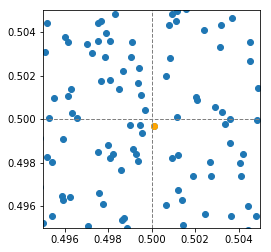

In [135]:
gca().set_aspect('equal')
xlim(0.495, 0.505)
ylim(0.495, 0.505)
axvline(x=0.5, ls='--', c='gray', lw=1)
axhline(y=0.5, ls='--', c='gray', lw=1)
scatter(xx, yy)
scatter([xx[idx]], [yy[idx]], c='orange');

KD-дерево значительно быстрее поиска в лоб, даже векторизованного

In [136]:
%%time
mindist = 1.0
minidx = -1
for i in xrange(N):
    dist = (xx[i] - 0.5) ** 2 + (yy[i] - 0.5) ** 2
    if dist < mindist:
        mindist = dist
        minidx = i
print minidx, sqrt(mindist)

112510 0.0003442443639
Wall time: 1.12 s


In [137]:
%%time
minidx = argmin((xx - 0.5) ** 2 + (yy - 0.5) ** 2)
print minidx, sqrt((xx[minidx] - 0.5) ** 2 + (yy[minidx] - 0.5) ** 2)

112510 0.0003442443639
Wall time: 34 ms


In [138]:
%timeit index.query([0.5, 0.5])

10000 loops, best of 3: 32.7 µs per loop
